# Проверка гипотез по увеличению выручки в интернет-магазине —оценить результаты A/B теста

## Описание проекта
Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Проект будет состоять из двух частей: 

Первая часть: Приоретизация гипотез методами ICE и RICE. Выводы по итогам приоретизации.

Данные для первой части:

Файл /datasets/hypothesis.csv.

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Вторая часть: Анализ A/B-теста: 

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Данные для второй части: 

Файл /datasets/orders.csv. 

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

## Описание данных


In [1]:
# Импортируем необходимые для проекта библиотеки. 

import pandas as pd
import datetime as dt
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [4]:
# Сохраним в переменные информацию из представленных для анализа файлов.

hypothesis = pd.read_csv('C:\\Users\\1325165\\Desktop\\prodject\\принятие решений в бизнесе\\hypothesis.csv')

orders = pd.read_csv('C:\\Users\\1325165\\Desktop\\prodject\\принятие решений в бизнесе\\orders.csv')

visitors = pd.read_csv('C:\\Users\\1325165\\Desktop\\prodject\\принятие решений в бизнесе\\visitors.csv', sep=',')

In [5]:
hypothesis.info()

orders.info()

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   

In [6]:
# Посмотрим на несколько верхних строк каждой таблицы, чтобы получить первоначальное представление 
# о данных.

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [7]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Мы получили три таблицы с данными: 
1. hypothesis: 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. 
Чем больше значение Efforts, тем дороже проверка гипотезы.

2. orders: 
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

3. visitors:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

Пропусков в данных нет, типы данных необходимо заменить только в столбцах с датами. Наименования столбцов менять не будем. 

In [9]:
# Произведем замену типов данных в таблицах orders и visitors.

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

Для удобства выделим день месяца из даты.

In [10]:
orders['month_day'] = pd.DatetimeIndex(orders['date']).day
visitors['month_day'] = pd.DatetimeIndex(visitors['date']).day

Проверим наличие дубликатов. 

In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.duplicated().sum()

0

Дубликатов нет, типы данных заменили, выделили число месяца из даты для удобства проосмотра графиков. Можно приступать к приоретизации гипотез.

In [13]:
# Посмотрим сколько у нас групп в тесте.

display(visitors['group'].unique())

display(orders['group'].unique())

array(['A', 'B'], dtype=object)

array(['B', 'A'], dtype=object)

У нас две группы: А и В. Вроде все как планировали.

In [14]:
# Найдем период проведения тестирования. 

display(visitors['date'].max())

display(visitors['date'].min())

# Проверим, что в таблице orders у нас тот же период, что и в visitors.

display(orders['date'].max())

display(orders['date'].min())

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

Timestamp('2019-08-01 00:00:00')

In [15]:
# Посчитаем количество уникальных пользователей по группам по таблице orders.

orders_a = orders[orders['group'] == "A"]['visitorId'].nunique()

orders_b = orders[orders['group'] == "B"]['visitorId'].nunique()

display(orders_a)
display(orders_b)

503

586

In [16]:
# Количество строк в таблице orders. 

len(orders)

1197

In [17]:
# Если считаем не уникальных пользователей, то ...

display(len(orders.query('group == "A"')))

display(len(orders.query('group == "B"')))


557

640

Где-то есть пересечение пользователей, т.е. те, кто попали в две группы.

In [18]:
# Посмотрим не попадают ли какие-то пользователи в обе группы одновременно.

# Для этого посчитаем количество групп для каждого уникального пользователя. 

# Затем отфильтруем тех, у кого групп больше 1.

group_ab = orders.pivot_table(index='visitorId', values='group', aggfunc='nunique')

group_ab.query('group > 1').count()

group    58
dtype: int64

58 пользователей попали в две группы. Удалим их для чистоты исследования.  

In [19]:
# Сохраним наших "дублей" в переменную. 

filters = group_ab.query('group > 1').reset_index()

filters = filters['visitorId']

In [20]:
# Отфильтруем таблицу с заказами.

orders = orders.query('visitorId not in @filters')

len(orders)

1016

In [21]:
# Повторно посчитаем количество уникальных пользователей по группам по таблице orders.

orders_a = orders[orders['group'] == "A"]['visitorId'].nunique()

orders_b = orders[orders['group'] == "B"]['visitorId'].nunique()

display(orders_a)
display(orders_b)

445

528

Удаляли 58 пользователей, а удалили - 181 строку... Не понимаю больше ничего...

Итого у нас остались 445 пользователей в группе A, и 528 пользователей в группе В. 

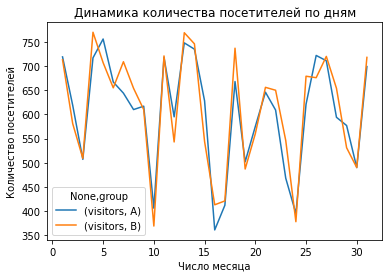

In [22]:
# Посмотрим динамику посетителей по дням в разрезе групп. 

visitors_groupby = visitors.groupby(['month_day', 'group']).agg({'visitors': 'sum'})

visitors_groupby.unstack().plot()

plt.title('Динамика количества посетителей по дням')
plt.xlabel('Число месяца')
plt.ylabel('Количество посетителей')
plt.show()


## Часть 1. Приоритизация гипотез.

В таблице hypothesis 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

Познакомимся с ними. 

In [23]:
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [24]:
ICE_score = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).sort_values(ascending=False)

round(ICE_score, 2)

8    16.20
0    13.33
7    11.20
6     8.00
2     7.00
1     2.00
5     1.33
3     1.12
4     1.00
dtype: float64

Высокий приоритет получили гипотезы:
- 'Запустить акцию, дающую скидку на товар в день рождения';
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей';
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'.

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [25]:
RICE_score = ((hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).sort_values(ascending=False)

RICE_score

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
dtype: float64

Высокий приоритет получили гипотезы: 
- 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок';
- 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа';
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей';
- 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'.
    

Приоретизация гипотез изменилась, с применением метода RICE, где мы оцениваем 4 критерия: влияние, уверенность, усилия, охват.

С учетом охвата аудитории пользователей, которых затронут изменения у нас появились гипотезы про блоки рекомендации товаров на сайте и показа баннеров с актуальными акциями на главной странице, т.к. данные гипотезы имеют влияние на больший охват аудитории.  

Будем думать, что в данном проекте мы рассматриваем гипотезу 7:  Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, или гипотезу 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. Обе этих гипотезы вошли в топ-3 приоретизации по обоим методам.

## Часть 2. Анализ А/В-теста.

Мы провели A/B-тест и получили результаты, которые описаны в таблицах orders и visitors. Проанализируем его результаты. 

Посмотрим на количество визитов в каждой группы:

In [26]:
visitors_a = visitors[visitors['group'] == "A"]['visitors'].unique().sum()

visitors_a

18736

In [27]:
visitors_b = visitors[visitors['group'] == "B"]['visitors'].unique().sum()

visitors_b

18262

Группа В на 3 % меньше группы A. Проверим не является ли эта разница статистически значимой в нашем случае.

Сохраним выборки по визитам по группам для проведения статистического анализа. 

In [28]:
# Выборка с визитами по группе А.

visitors_a = visitors[visitors['group'] == "A"]['visitors'].unique()

# Выборка с визитами по группе В.

visitors_b = visitors[visitors['group'] == "B"]['visitors'].unique()

Гипотезы: 
    
    Н0: Выборки не измеют статистически значимых различий. 
    Н1: Выборки имеют статистически значимые различия.

Применим непараметрический тест Уилкоксона-Манна-Уитни, т.к. возможно в данных есть выбросы, чтобы исключить их влияние воспользуемся этим тестом. 

In [29]:
alpha = 0.05 # критический уровень статистической значимости

results = st.mannwhitneyu(visitors_a, visitors_b)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница между группами статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: разница между количеством посещений статистически не значима.')

p-значение: 0.7729362141037645
Не получилось отвергнуть нулевую гипотезу: разница между количеством посещений статистически не значима.


Разница между численностью посещений по группам статистически не значима, можем проводить анализ результатов теста.

1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения. 

In [30]:
# Создаем массив уникальных пар значений дат и групп теста.

datesGroups = orders[['month_day','group']].drop_duplicates()
datesGroups

,month_day,group
0,15,B
7,15,A
45,16,A
47,16,B
55,1,A
...,...,...
1068,12,A
1114,13,B
1116,13,A
1149,14,B


In [31]:
# Создаем таблицу с данными о количестве заказов по дням по группам.

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['month_day'] <= x['month_day'], visitors['group'] == x['group'])]
                                       .agg({'month_day' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['month_day','group'])
visitorsAggregated

,month_day,group,visitors
55,1,A,719
66,1,B,713
175,2,A,1338
173,2,B,1294
291,3,A,1845
...,...,...,...
533,29,B,17708
757,30,A,18037
690,30,B,18198
958,31,A,18736


In [32]:
# Создаем таблицу с данными о количестве посетителей по дням по группам, 
# о количестве покупок по дням по группам, о сумме выручки по дням по группам.

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['month_day'] <= x['month_day'], orders['group'] == x['group'])]\
.agg({'month_day' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['month_day','group'])

ordersAggregated

,month_day,group,transactionId,visitorId,revenue
55,1,A,23,19,142779
66,1,B,17,17,59758
175,2,A,42,36,234381
173,2,B,40,39,221801
291,3,A,66,60,346854
...,...,...,...,...,...
533,29,B,510,490,4746610
757,30,A,460,437,3311413
690,30,B,531,511,4955833
958,31,A,468,445,3364656


In [33]:
# Объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия.

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['month_day', 'group'], right_on=['month_day', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


In [34]:
# Посмотрим минимальную дату.

cumulativeData['date'].min()

1

In [35]:
# Посмотрим максимальную дату. 

cumulativeData['date'].max()

31

In [36]:
# Оценим визуально полученную таблицу.

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,1,A,23,19,142779,719
1,1,B,17,17,59758,713
2,2,A,42,36,234381,1338
3,2,B,40,39,221801,1294
4,3,A,66,60,346854,1845
...,...,...,...,...,...,...
57,29,B,510,490,4746610,17708
58,30,A,460,437,3311413,18037
59,30,B,531,511,4955833,18198
60,31,A,468,445,3364656,18736


In [37]:
# Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А.

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# Создаем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B.

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


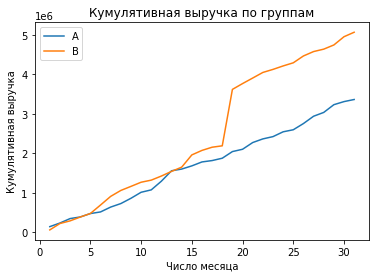

In [38]:
# Строим график выручки группы А.

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B.

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Число месяца')
plt.ylabel('Кумулятивная выручка')
plt.title('Кумулятивная выручка по группам')

plt.legend()
plt.show()

Выручка почти равномерно увеличивается на проятжении всего теста, за исключением скачка в тестовой группе В, скорее всего это был како-то аномально большой заказ, либо это был всплеск покупательской активности, который может быть обусловлен внесенными изменениями в группе В. По данному графику можно сделать первичные выводы о том, что тестовая группа В приносит больше прибыли, чем группа А.

2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения. 

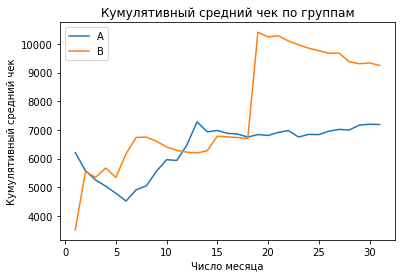

In [39]:
# Строим график по кумулятивным данным по среднему чеку. 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Число месяца')
plt.ylabel('Кумулятивный средний чек')
plt.title('Кумулятивный средний чек по группам')

plt.legend()
plt.show()
 

Снова наблюдаем резкий скачет в группе В, возможно там закрался значительный по сумме заказ, который оказал влияние на оба графика. Средний чек, также как и выручка в группе В выше, чем в группе А. Но заметно снижение среднего чека в группе В, скорее всего его значение еще не окончательно установилось, а вот средний чек в группе А скорее всего вышел на свой обычный уровень - установился. 

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

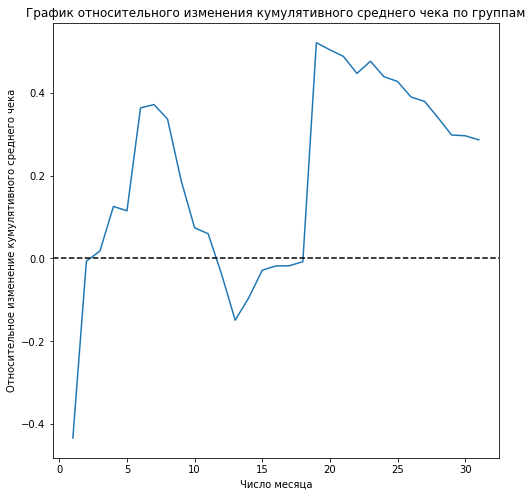

In [40]:
# Собираем данные для графика в одном датафрейме.

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Строим отношение средних чеков.

plt.figure(figsize=(8, 8))

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1) 

plt.xlabel('Число месяца')
plt.ylabel('Относительное изменение кумулятивного среднего чека')
plt.title('График относительного изменения кумулятивного среднего чека по группам')


# Добавляем ось X.

plt.axhline(y=0, color='black', linestyle='--')

plt.show()

В ряде дней график значительно ломается, а значит, на наши данные оказывают влияние аномальные значения. Перепады на самом деле в тех же местах, что и по графику с кумулятивным средним чеком. В самом начале теста резкое падение группы В относительно А, далее группа В стала лидировать и мы видим пик примерно с 6 по 9 число, далее падение группы В относительно в период с 11 по 18 число (примерно), ну и резкий скачок 19-20 числа, где скорее всего в группе В произошел большой заказ, далее график фактически повторяет линию графика по группе В по кумулятивному среднему чеку, т.к. в обоих группах в этот период значиния чеков более менее установились.

4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

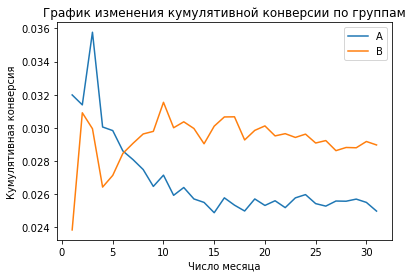

In [41]:
# Считаем кумулятивную конверсию.

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Отделяем данные по группе A.

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# Отделяем данные по группе B.

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# Строим графики.

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xlabel('Число месяца')
plt.ylabel('Кумулятивная конверсия')
plt.title('График изменения кумулятивной конверсии по группам')

plt.legend()

Конверсия в покупателей колебалась примерно симметрично. В начале группа А вырывалась вперед, но к концу теста (и графика) мы наблюдаем, что конверсия в группе В ~ 0.34 установилась на уровне выше, чем группа А ~ 0.28. 

5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

<function matplotlib.pyplot.show(close=None, block=None)>

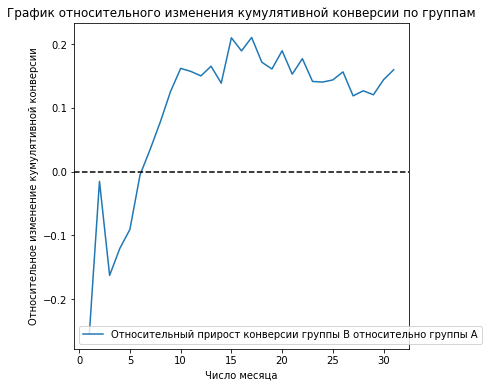

In [42]:
# Сделаем таблицу с кумулятивными данными по двум группам о дате и конверсии.

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(6, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')

plt.xlabel('Число месяца')
plt.ylabel('Относительное изменение кумулятивной конверсии')
plt.title('График относительного изменения кумулятивной конверсии по группам')
plt.show 


В начале теста группа В значительно проигравыла группе А, но через непродолжительное время группа стала лидировать и за период теста больше не падала, можно считать, что она более-менее установилась.

6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [43]:
# Посчитаем кол-во заказов приходящееся на одного клиента.

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

Text(0.5, 1.0, 'Диаграмма количества заказов, приходящихся на одного пользователя')

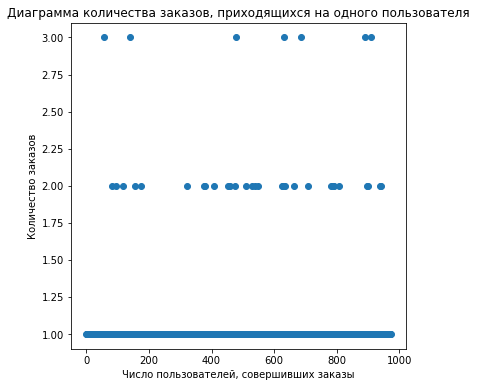

In [44]:
# Построим точечную диаграмму по количеству заказов приходящихся на одного клиента.

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(6, 6))

plt.scatter(x_values, ordersByUsers['orders'])


plt.xlabel('Число пользователей, совершивших заказы')
plt.ylabel('Количество заказов')
plt.title('Диаграмма количества заказов, приходящихся на одного пользователя')
 

Наибольшее число пользователей сделали по одному заказу, небольшой процент сделали по 2 заказа, более 2 заказов делали единицы пользователей. 

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [45]:
# Считаем 95-й и 99-й перцентили для количества заказов.

np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Итак, 95% пользователей делают 2 и менее заказов, и только 1% пользователей делают свыше 4 заказов. При удалении аномальных значений будем убирать заказы более 3. 

In [46]:
# Сохраним число заказов в переменную-фильтр.

count_orders_filter = 2

count_orders_filter

2

8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [47]:
# Посчитаем сумму заказов приходящююся на одного клиента.

revenueByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'})
)

revenueByUsers.columns = ['userId', 'revenue']

Text(0.5, 1.0, 'Диаграмма сумм заказов, приходящихся на одного пользователя')

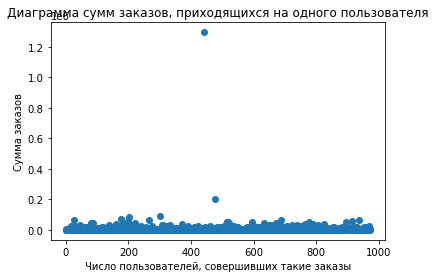

In [48]:
# Строим точечную диаграмму по сумме выручки.

x_values = pd.Series(range(0,len(revenueByUsers)))

plt.scatter(x_values, revenueByUsers['revenue'])

plt.xlabel('Число пользователей, совершивших такие заказы')
plt.ylabel('Сумма заказов')
plt.title('Диаграмма сумм заказов, приходящихся на одного пользователя')

Text(0.5, 1.0, 'Диаграмма сумм заказов, приходящихся на одного пользователя')

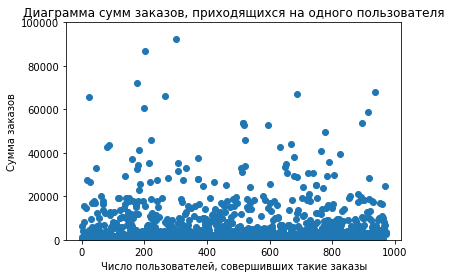

In [49]:
# Строим точечную диаграмму по сумме выручки с ограничением по оси Y.

x_values = pd.Series(range(0,len(revenueByUsers)))

plt.scatter(x_values, revenueByUsers['revenue'])
plt.ylim([0, 100000])
plt.xlabel('Число пользователей, совершивших такие заказы')
plt.ylabel('Сумма заказов')
plt.title('Диаграмма сумм заказов, приходящихся на одного пользователя')

Заказы свыше 20000,00 были очень редкими, также видим, что был очень крупный заказ на 1.2 млн.

9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [50]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Заказы свыше 26 тысяч сделали только 5 процентов, заказы свыше 53 тысяч сделали 1 % клиентов. Аномальными будем считать значения свыше 26785.0. 

In [51]:
# Сохраним фильтр в переменную.

orders_filter = 26785

orders_filter

26785

10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

Подготовим данные для анализа. 

Нам необходимо посчитать:

- количество заказов в выбранную дату по группам, 
- суммарную выручку в выбранную дату по группам, 
- суммарное число заказов до выбранной даты включительно по группам, 
- суммарную выручку до выбранной даты включительно по группам, 
- количество пользователей в выбранную дату по группам, 
- количество пользователей до выбранной даты включительно по группам, 
все это нам необходимо привязать к столбцу с датой. 

Для этого нам понадобятся таблицы orders и visitors.

In [52]:
# Находим все строки с датами и пользователями из группы А.

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Находим все строки с датами и пользователями до выбранной даты в группе А.

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Находим все строки с датами и пользователями из группы В.

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']


# Находим все строки с датами и пользователями до выбранной даты в группе В.

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Считаем количество количество заказов, выручку, количество посетителей по дням в группе А.

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Считаем количество количество заказов, выручку, количество посетителей в указанную дату в группе А.

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Считаем количество количество заказов, выручку, количество посетителей по дням в группе В.

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Считаем количество количество заказов, выручку, количество посетителей в указанную дату в группе В.

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [53]:
# Объединяем полученные таблицы в одну.

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Итого мы получили таблицу со столбцами:
date — дата;
ordersPerDateA — количество заказов в выбранную дату в группе A;
revenuePerDateA — суммарная выручка в выбранную дату в группе A;
ordersPerDateB — количество заказов в выбранную дату в группе B;
revenuePerDateB — суммарная выручка в выбранную дату в группе B;
ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
visitorsPerDateA — количество пользователей в выбранную дату в группе A;
visitorsPerDateB — количество пользователей в выбранную дату в группе B;
visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Сформулируем гипотезы: 

Н0: различий в конверсии в заказы заказов между группами "по сырым" данным нет.

Н1: различия в конверсии между группами есть.

Посчитаем статистическую значимость различия в конверсии в заказы заказов между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 

В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [54]:
# Создаем переменную для группы А с заказами для каждого пользователя. 

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# Создаем переменную для группы В с заказами для каждого пользователя. 

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [55]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA']
                                                                           .sum() - len(ordersByUsersA['orders'])),
                                                        name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB']
                                                                           .sum() - len(ordersByUsersB['orders'])),
                                                        name='orders')],axis=0)

In [56]:
# Применим критерий Манна-Уитни для полученных переменных с количествами заказов.

print('p-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('различие в средних:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
различие в средних: 0.160


По «сырым» данным различий в конверсии в заказы между группами A и B нет.
Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, мы отвергаем. Относительный выигрыш группы B равен 16% — второе число в выводе.

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Н0: различий в среднем чеке между группами нет. Н1: различия в среднем чеке между группами есть.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.

In [57]:
# Применим критерий Манна-Уитни для данных о выручке с заказов.

print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))
print('различие в средних:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
различие в средних: 0.287


P-value=0.829, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B не ниже среднего чека группы A, а незначительно выше = 0.287. Наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно получены случайно.

12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

In [58]:
# Отфильтруем данные по количеству заказов менее 3 и по сумме покупки менее 26785.0.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= count_orders_filter]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= count_orders_filter]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders_filter]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64

86

In [59]:
# Отфильтруем данные по количеству заказов менее 3 и по сумме покупки менее 26785.0.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >= np.percentile(ordersByUsers['orders'], 99)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] >= np.percentile(ordersByUsers['orders'], 99)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
display(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
36      366673373
51      406208401
67      522292794
dtype: int64

45

Всего 86 аномальных пользователей.

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [60]:
# Создадим переменные с отфильтрованными данными по количеству заказов по пользователмя по тестовым группам. 

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:


In [61]:
print('p-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('различие в средних:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.008
различие в средних: 0.188


По отфильтрованным данным различий в конверсии в заказы между группами A и B нет.
Первое число — p-value = 0.016 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный выигрыш группы B равен 17.4% — второе число в выводе.

Отличия отфильтрованных данных от "сырых" не значительное. p-value 0.11 против 0.16. 
Количество заказов в группе В по отфильтрованным данным также не сильно отличается от "сырых": 16.% против 17.4%.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [62]:
# Применим критерий Манна-Уитни для очищенных данных по среднему чеку. 

print('p-value:', 
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('различие в средних:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.969
различие в средних: 0.002


P-value увеличился, но и разница между сегментами сократилась с 28,7% до 0,2%.

P-value=0.969, что значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

14. Примем решение по результатам теста.

По результатам анализа мы не наблюдаем значительных изменений в среднем чеке, но зато фиксируем увеличение конверсии в группе В. Увеличение конверсии и плюс даже незначительное увеличение чека это успех и тест можно останавливать. Считаем, что группа В победила и можно вводить тестируемую гипотезу в постоянную работу.  

## Вывод

У нас было 9 гипотез, которые мы приотеризировали 2 методами: ICE и RICE. 

Две гипотезы вошли в ТОП-3 приоретизации по обоим методам, это: 
- гипотеза 7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- гипотезу 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей. 

Тестирование гипотезы проводилось в период с 1 по 31 августа.

Тестовых группы было 2: А и В. Численность тестовых групп (уникальных пользователей): А - 445 и В - 528. 

Перед проведением статистических тестов мы убедились, что выборки с визитами по группам не имеют статитсически значимых различий, применив тест Уилкоксона-Манна-Уитни. 

По графику кумулятивной выручки по группам мы определили, что выручка почти равномерно увеличивается на проятжении всего теста, за исключением скачка в тестовой группе В, скорее всего это был како-то аномально большой заказ. По данному графику можно сделать первичные выводы о том, что тестовая группа В приносит больше прибыли, чем группа А.

График кумулятивного среднего чека также показал резкий скачек в группе В, возможно там закрался значительный по сумме заказ, который оказал влияние на оба графика. Средний чек, также как и выручка в группе В выше, чем в группе А. Но заметно снижение среднего чека в группе В, скорее всего его значение еще не окончательно установилось, а вот средний чек в группе А скорее всего вышел на свой обычный уровень - установился. 

По графику изменения кумулятивной конверсии по группам мы увидели, что конверсия в покупателей колебалась примерно симметрично. В начале группа А вырывалась вперед, но к концу теста (и графика) мы наблюдаем, что конверсия в группе В ~ 0.34 установилась на уровне выше, чем группа А ~ 0.28.

Провели тестирование гипотез о наличии различий в конверсии в заказы между группами А и В по "сырым" данным. 
Оно показало, что статистически значимых различий в конверсии между группами нет, но относительный выигрыш группы B равен 16%.

Также провели тестирование гипотезы о наличии различий в среднем чеке по "сырым" данным. И выяснили, что статистически значимых различий в среднем чеке между группами нет, но средний чек группы B не ниже среднего чека группы A, а незначительно выше = 0.287. Наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно получены случайно.

Далее мы определили границы выбросов в числе заказов, приходящихся на одного пользователя и в суммах заказов. Число заказов > 2 - выброс, сумма заказа > 26785.0 - выброс. Мы отфильтровали данные от выбросов.

Провели повторные статистические тесты по конверсии и среднему чеку по отфильтрованным данным. И пришли к выводу, что мы наблюдаем статистически значимые различия в конверсии. Пусть и не на много, но она выше в группе В (в среднем она выше на 17,4%). По результатам тестирования по отфильтрованным от аномалий данных мы не наблюдаем значительных изменений в среднем чеке. 

Увеличение конверсии и плюс даже незначительное увеличение чека это успех и тест можно останавливать. 

Считаем, что группа В победила и можно вводить тестируемую гипотезу в постоянную работу.